In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Import Iris Data set 
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


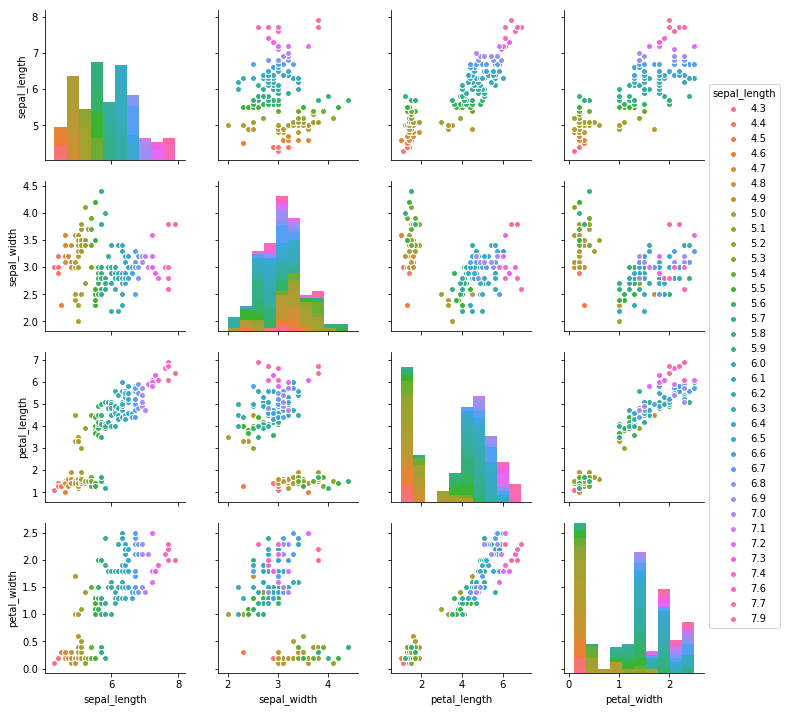

In [4]:
sns.pairplot(iris, hue='sepal_length')

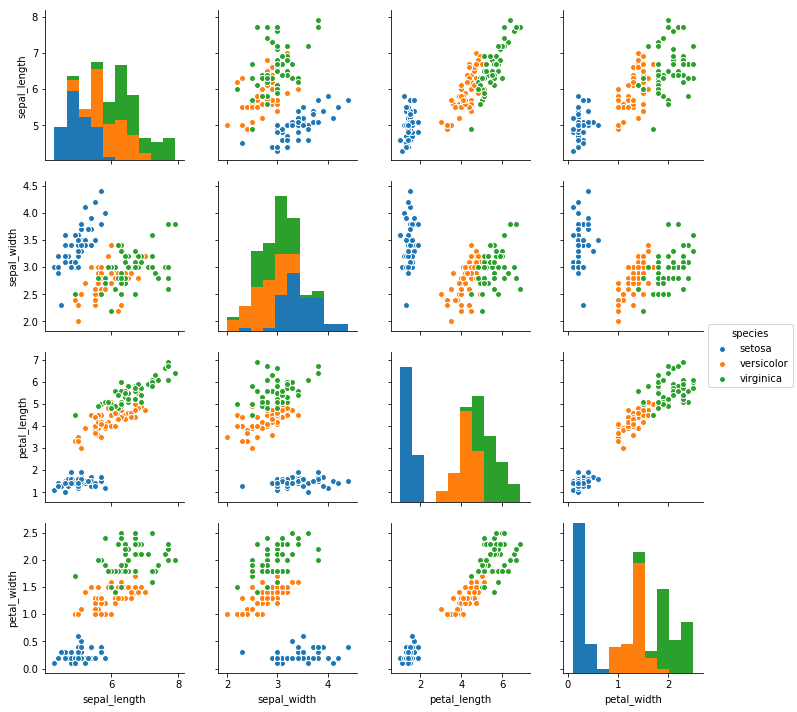

In [5]:
sns.pairplot(iris, hue='species')

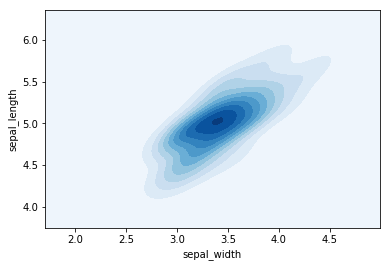

In [6]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa[ 'sepal_width'] , setosa ['sepal_length'],cmap = 'Blues', shade= True)

In [7]:
from sklearn.cross_validation import train_test_split

C:\Users\wael\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3)

In [9]:
from sklearn.svm import SVC
svc_model = SVC()

In [10]:
svc_model.fit(X=X_train,y=y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
prediction = svc_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test, prediction))

[[12  0  0]
 [ 0 16  0]
 [ 0  0 17]]


In [14]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        45



In [15]:
from sklearn.grid_search import GridSearchCV

C:\Users\wael\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
import matplotlib.pyplot as plt
from sklearn import svm

In [17]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [18]:
X = iris.iloc[ : ,:2]
yPrime = pd.factorize(iris['species'])
y = yPrime[0]

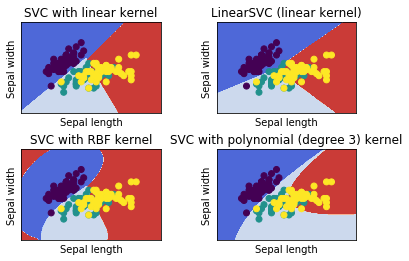

In [19]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,      s=20,       cmap=plt.cm.coolwarm)
    ax.scatter(X0, X1, c=y)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()